# **SOLUCIÓN DEL PROFESOR - NO PUBLICAR**

# Maestría en Inteligencia Artificial Aplicada

## Curso: Inteligencia Artificial y Aprendizaje Automático

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de las Semanas 5 y 6
### **Problema de asignación de créditos: South German Dataset.**


## **Nombres y matrículas:**



*   **Martin Jurado Pedroza - A01795568**



# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, FunctionTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import imblearn.pipeline as imb_pipeline
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Si se desean comentar algunos de los Warnings.
import warnings
warnings.filterwarnings('ignore')
file_path = 'data/SouthGermanCredit.asc'

dt = pd.read_csv(file_path, delim_whitespace=True)

In [3]:
dt.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

In [4]:
# Carga y renombra los nombres de las columnas del alemán al inglés y desplegamos
# de nuevo el DataFrame para ver el resultado obtenido:
file_path = 'data/SouthGermanCredit.asc'

df = pd.read_csv(file_path, delim_whitespace=True)

# Diccionario de los nuevos nombres de las columnas
column_renames = {
    'laufkont': 'status',
    'laufzeit': 'duration',
    'moral': 'credit_history',
    'verw': 'purpose',
    'hoehe': 'amount',
    'sparkont': 'savings',
    'beszeit': 'employment_duration',
    'rate': 'installment_rate',
    'famges': 'personal_status_sex',
    'buerge': 'other_debtors',
    'wohnzeit': 'present_residence',
    'verm': 'property',
    'alter': 'age',
    'weitkred': 'other_installment_plans',
    'wohn': 'housing',
    'bishkred': 'number_credits',
    'beruf': 'job',
    'pers': 'people_liable',
    'telef': 'telephone',
    'gastarb': 'foreign_worker',
    'kredit': 'credit_risk'
}

# Renombrar las columnas
df.rename(columns=column_renames, inplace=True)

# *********** Aquí termina la sección de agregar código *************
df.head().T

,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

## **Ejercicio 2**

In [6]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.


df['credit_risk'] = df['credit_risk'].map({1: 0, 0: 1})


print(df['credit_risk'].value_counts())

credit_risk
0    700
1    300
Name: count, dtype: int64


## **Ejercicio 3**

In [7]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# Separar características y etiquetas
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

# Dividir los datos en entrenamiento (70%) y prueba+validación (30%)
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Dividir los datos de prueba+validación en validación (50%) y prueba (50%)
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, random_state=42, stratify=ytemp)

# Mostrar las dimensiones de la partición generada
print("Dimensiones:")
print("Entrenamiento:", Xtrain.shape, ytrain.shape)
print("Validación:", Xval.shape, yval.shape)
print("Prueba:", Xtest.shape, ytest.shape)

# Mostrar el porcentaje de cada clase de la variable de salida en el conjunto de entrenamiento
tmp = ytrain.sum()/ytrain.shape[0]
print("\nPorcentaje clases Positiva: %.2f%%, y Negativa: %.2f%%" % (tmp*100, 100*(1-tmp)))



Dimensiones:
Entrenamiento: (700, 20) (700,)
Validación: (150, 20) (150,)
Prueba: (150, 20) (150,)

Porcentaje clases Positiva: 30.00%, y Negativa: 70.00%


### **Con base al porcentaje de los niveles de la variable de salida ¿podemos decir que tenemos un problema de datos desbalanceado? ¿Por qué?**




Sí, podemos decir que tenemos un problema de desbalanceo de datos en la variable de salida. Esto se debe a que el porcentaje de las clases positiva y negativa en el conjunto de entrenamiento no es equilibrado.

En este caso, el porcentaje de la clase positiva (mal cliente) es del 30%, mientras que el porcentaje de la clase negativa (buen cliente) es del 70%. Esta disparidad en los porcentajes indica un desbalance en los datos, lo que significa que una clase está sobrerrepresentada en comparación con la otra.






## **Ejercicio 4**

### **Descripción de Variables:**

### **Variables de entrada Categóricas Nominales**

1. **credit_history** (Historial de crédito):
   - **Descripción**: Historial de pagos del cliente.
   - **Tipo de variable**: Categórica nominal
   - **Niveles**:
     - 0: delay in paying off in the past
     - 1: critical account/other credits elsewhere
     - 2: no credits taken/all credits paid back duly
     - 3: existing credits paid back duly till now
     - 4: all credits at this bank paid back duly

2. **purpose** (Propósito):
   - **Descripción**: Propósito del crédito solicitado.
   - **Tipo de variable**: Categórica nominal
   - **Niveles**:
     - 0: others
     - 1: car (new)
     - 2: car (used)
     - 3: furniture/equipment
     - 4: radio/television
     - 5: domestic appliances
     - 6: repairs
     - 7: education
     - 8: vacation
     - 9: retraining
     - 10: business

3. **personal_status_sex** (Estado civil y sexo):
   - **Descripción**: Estado civil y sexo del cliente.
   - **Tipo de variable**: Categórica nominal
   - **Niveles**:
     - 1: male : divorced/separated
     - 2: female : non-single or male : single
     - 3: male : married/widowed
     - 4: female : single

4. **other_debtors** (Otros deudores):
   - **Descripción**: Información sobre otros deudores o garantes.
   - **Tipo de variable**: Categórica nominal
   - **Niveles**:
     - 1: none
     - 2: co-applicant
     - 3: guarantor

5. **other_installment_plans** (Otros planes de cuotas):
   - **Descripción**: Otros planes de pago del cliente.
   - **Tipo de variable**: Categórica nominal
   - **Niveles**:
     - 1: bank
     - 2: stores
     - 3: none

6. **housing** (Vivienda):
   - **Descripción**: Tipo de vivienda del cliente.
   - **Tipo de variable**: Categórica nominal
   - **Niveles**:
     - 1: for free
     - 2: rent
     - 3: own

### **Variables Categóricas Binarias**

1. **people_liable** (Personas a cargo):
   - **Descripción**: Número de personas a cargo.
   - **Tipo de variable**: Categórica binaria
   - **Niveles**:
     - 1: 3 or more
     - 2: 0 to 2

2. **telephone** (Teléfono):
   - **Descripción**: Disponibilidad de teléfono a nombre del cliente.
   - **Tipo de variable**: Categórica binaria
   - **Niveles**:
     - 1: no
     - 2: yes (under customer name)

3. **foreign_worker** (Trabajador extranjero):
   - **Descripción**: Si el cliente es trabajador extranjero.
   - **Tipo de variable**: Categórica binaria
   - **Niveles**:
     - 1: yes
     - 2: no

4. **credit_risk** (Riesgo crediticio):
   - **Descripción**: Riesgo crediticio del cliente.
   - **Tipo de variable**: Categórica binaria
   - **Niveles**:
     - 0: bad
     - 1: good

### **Variables Categóricas Ordinales**

1. **status** (Estado del cuenta corriente):
   - **Descripción**: Estado de la cuenta corriente del cliente.
   - **Tipo de variable**: Categórica ordinal
   - **Niveles**:
     - 1: no checking account
     - 2: ... < 0 DM
     - 3: 0 <= ... < 200 DM
     - 4: ... >= 200 DM / salary for at least 1 year

2. **savings** (Ahorros):
   - **Descripción**: Ahorros del cliente.
   - **Tipo de variable**: Categórica ordinal
   - **Niveles**:
     - 1: unknown/no savings account
     - 2: ... < 100 DM
     - 3: 100 <= ... < 500 DM
     - 4: 500 <= ... < 1000 DM
     - 5: ... >= 1000 DM

3. **employment_duration** (Duración del empleo):
   - **Descripción**: Duración del empleo actual del cliente.
   - **Tipo de variable**: Categórica ordinal
   - **Niveles**:
     - 1: unemployed
     - 2: < 1 yr
     - 3: 1 <= ... < 4 yrs
     - 4: 4 <= ... < 7 yrs
     - 5: >= 7 yrs

4. **property** (Propiedad):
   - **Descripción**: Propiedad del cliente.
   - **Tipo de variable**: Categórica ordinal
   - **Niveles**:
     - 1: unknown / no property
     - 2: car or other
     - 3: building soc. savings agr./life insurance
     - 4: real estate

5. **job** (Trabajo):
   - **Descripción**: Tipo de trabajo del cliente.
   - **Tipo de variable**: Categórica ordinal
   - **Niveles**:
     - 1: unemployed/unskilled - non-resident
     - 2: unskilled - resident
     - 3: skilled employee/official
     - 4: manager/self-empl./highly qualif. employee

6. **installment_rate** (Tasa de cuota):
   - **Descripción**: Tasa de cuota como porcentaje del ingreso disponible.
   - **Tipo de variable**: Categórica ordinal
   - **Niveles**:
     - 1: >= 35
     - 2: 25 <= ... < 35
     - 3: 20 <= ... < 25
     - 4: < 20

7. **present_residence** (Residencia actual):
   - **Descripción**: Duración de la residencia actual del cliente.
   - **Tipo de variable**: Categórica ordinal
   - **Niveles**:
     - 1: < 1 yr
     - 2: 1 <= ... < 4 yrs
     - 3: 4 <= ... < 7 yrs
     - 4: >= 7 yrs

8. **number_credits** (Número de créditos):
   - **Descripción**: Número de créditos en esta institución.
   - **Tipo de variable**: Categórica ordinal
   - **Niveles**:
     - 1: 1
     - 2: 2-3
     - 3: 4-5
     - 4: >= 6

### **Variables Numéricas Reales**

1. **duration** (Duración):
   - **Descripción**: Duración del crédito en meses.
   - **Tipo de variable**: Numérica real (float)

2. **amount** (Monto):
   - **Descripción**: Monto del crédito solicitado.
   - **Tipo de variable**: Numérica real (float)

3. **age** (Edad):
   - **Descripción**: Edad del cliente en años.
   - **Tipo de variable**: Numérica real (float)



## **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

Análisis de la variable categórica: credit_history
credit_history
2    530
4    293
3     88
1     49
0     40
Name: count, dtype: int64


Análisis de la variable categórica: purpose
purpose
3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: count, dtype: int64


Análisis de la variable categórica: personal_status_sex
personal_status_sex
3    548
2    310
4     92
1     50
Name: count, dtype: int64


Análisis de la variable categórica: other_debtors
other_debtors
1    907
3     52
2     41
Name: count, dtype: int64


Análisis de la variable categórica: other_installment_plans
other_installment_plans
3    814
1    139
2     47
Name: count, dtype: int64


Análisis de la variable categórica: housing
housing
2    714
1    179
3    107
Name: count, dtype: int64


Análisis de la variable categórica: people_liable
people_liable
2    845
1    155
Name: count, dtype: int64


Análisis de la variable categórica: telephone
telephone
1    596
2

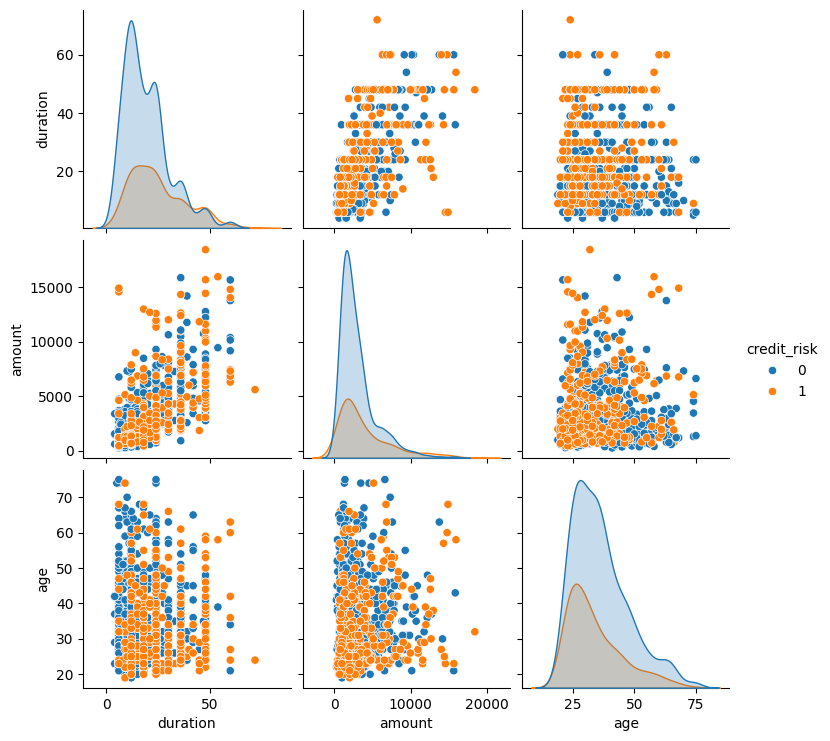

In [8]:
# Función para realizar un análisis descriptivo de variables categóricas y numéricas, y visualización
# Definimos una función para realizar el análisis descriptivo
def descriptive_analysis(df):
    # Análisis descriptivo de variables categóricas
    categorical_variables = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 
                             'other_installment_plans', 'housing', 'people_liable', 'telephone', 
                             'foreign_worker', 'credit_risk', 'status', 'savings', 'employment_duration', 
                             'property', 'job', 'installment_rate', 'present_residence', 'number_credits']
    for column in categorical_variables:
        print(f"Análisis de la variable categórica: {column}")
        print(df[column].value_counts())
        print("\n")
    
    # Análisis descriptivo de variables numéricas
    numerical_variables = df[['duration', 'amount', 'age']]
    print("Análisis de variables numéricas")
    print(numerical_variables.describe())
    
    # Visualización de distribuciones y relaciones
    sns.pairplot(df[['duration', 'amount', 'age', 'credit_risk']], hue='credit_risk')
    plt.show()

# Llamar a la función con el DataFrame como argumento
descriptive_analysis(df)


### **Describe y explica a continuación las transformaciones que has decidido aplicar a cada columna:**

- Para las variables categoricas, se utiliza OneHotEncoder

- Al valorar la información en el análisis para las variables númericas, esta puede ser tratadas con transformaciones de logaritmo neperiano o natural, los ayuda 


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

In [9]:


# Pipeline para variables numéricas (aplicando transformación logarítmica)
num_pipe = Pipeline([
    ('log_transform', FunctionTransformer(np.log1p, validate=True))  # log1p para manejar ceros de manera segura
])

# Pipeline para variables categóricas (aplicando One-Hot Encoding)
cat_pipe = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

# ColumnTransformer para aplicar las transformaciones
columnasTransformer = ColumnTransformer([
    ('num', num_pipe, ['duration', 'amount', 'age']),  # Variables numéricas
    ('cat', cat_pipe, ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 
                       'other_installment_plans', 'housing', 'people_liable', 'telephone', 
                       'foreign_worker', 'status', 'savings', 'employment_duration', 
                       'property', 'job', 'installment_rate', 'present_residence', 'number_credits'])
])



## **Ejercicio 7**

In [10]:
# Concatenación de los conjuntos de entrenamiento y validación
Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainval = pd.concat([ytrain, yval], axis=0)

# Aplicar las transformaciones y ver la nueva dimensionalidad
Xtmp = Xtrainval.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión de las variables de entrada ANTES de las transformaciones:", Xtmp.shape)
print("Dimensión de las variables de entrada DESPUÉS de las transformaciones:", tmp.shape)

Dimensión de las variables de entrada ANTES de las transformaciones: (850, 20)
Dimensión de las variables de entrada DESPUÉS de las transformaciones: (850, 71)


## **Ejercicio 8**

In [11]:


# Define la función para buscar los mejores parámetros utilizando GridSearchCV
def buscar_mejores_parametros(modelo, parametros_busqueda, X_train, y_train):
    grid_search = GridSearchCV(modelo, parametros_busqueda, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

# Definir una función para crear y retornar una lista de modelos
def mis_modelos():
    modelos = []
    nombres = []
    # Árbol de decisiones
    modelos.append(DecisionTreeClassifier())
    nombres.append('DTree')
    
    # Random Forest
    modelos.append(RandomForestClassifier())
    nombres.append('RF')

    # XGBoost
    modelos.append(XGBClassifier())
    nombres.append('XGBoost')

    # MLP
    modelos.append(MLPClassifier())
    nombres.append('MLP')

    # SVM
    modelos.append(SVC())
    nombres.append('SVM')

    return modelos, nombres

# Entrenamiento y evaluación de los modelos con búsqueda de hiperparámetros
modelos, nombres = mis_modelos()
resultados = []
mejores_modelos = {}  # Diccionario para almacenar los mejores modelos y parámetros

for modelo, nombre in zip(modelos, nombres):
    # Definir los parámetros a buscar para cada modelo
    parametros_busqueda = {}
    if nombre == 'DTree':
        parametros_busqueda = {'max_depth': [3, 5, 7, None],
                               'min_samples_split': [2, 5, 10]}
    elif nombre == 'RF':
        parametros_busqueda = {'n_estimators': [50, 100, 200],
                               'max_depth': [3, 5, 7, None],
                               'min_samples_split': [2, 5, 10]}
    elif nombre == 'XGBoost':
        parametros_busqueda = {'learning_rate': [0.1, 0.01, 0.001],
                               'max_depth': [3, 5, 7],
                               'min_child_weight': [1, 3, 5]}
    elif nombre == 'MLP':
        parametros_busqueda = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
                               'activation': ['logistic', 'relu'],
                               'alpha': [0.0001, 0.001, 0.01]}
    elif nombre == 'SVM':
        parametros_busqueda = {'kernel': ['rbf'], 'gamma': ['scale']}
    
    # Realizar la búsqueda de hiperparámetros
    mejor_parametro = buscar_mejores_parametros(modelo, parametros_busqueda, Xtrainval, ytrainval)
    
    # Guardar el mejor modelo y sus mejores parámetros en el diccionario
    mejores_modelos[nombre] = {'modelo': modelo, 'mejor_parametro': mejor_parametro}
    
    # Construir el pipeline con el mejor modelo
    pipeline = Pipeline(steps=[('ct', columnasTransformer),
                                ('m', modelo.set_params(**mejor_parametro))])

    # Aplicar validación cruzada
    micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=5)

    # Definir las métricas que desamos recuperar como una lista de cadenas
    mismetricas = ['accuracy', 'precision', 'recall', 'f1']

    # Entrenar y evaluar el modelo
    scores = cross_validate(pipeline, Xtrainval, ytrainval, scoring=mismetricas, cv=micv, return_train_score=True)

    # Guardar el resultado de cada modelo para análisis posteriores
    resultados.append(scores)

    # Mostrar las métricas de evaluación
    print('>>', nombre)
    for metrica in mismetricas:
        print(f'\t{metrica}: {np.mean(scores[f"test_{metrica}"]):.3f} (std: {np.std(scores[f"test_{metrica}"]):.3f})')

# Imprimir el diccionario de mejores modelos y parámetros
print("Mejores modelos y parámetros:", mejores_modelos)



>> DTree
	accuracy: 0.704 (std: 0.030)
	precision: 0.514 (std: 0.100)
	recall: 0.282 (std: 0.132)
	f1: 0.347 (std: 0.116)
>> RF
	accuracy: 0.749 (std: 0.021)
	precision: 0.642 (std: 0.058)
	recall: 0.363 (std: 0.060)
	f1: 0.463 (std: 0.059)
>> XGBoost
	accuracy: 0.747 (std: 0.030)
	precision: 0.609 (std: 0.081)
	recall: 0.442 (std: 0.075)
	f1: 0.509 (std: 0.069)
>> MLP
	accuracy: 0.747 (std: 0.021)
	precision: 0.593 (std: 0.045)
	recall: 0.511 (std: 0.047)
	f1: 0.548 (std: 0.037)
>> SVM
	accuracy: 0.719 (std: 0.008)
	precision: 0.872 (std: 0.150)
	recall: 0.082 (std: 0.039)
	f1: 0.146 (std: 0.060)
Mejores modelos y parámetros: {'DTree': {'modelo': DecisionTreeClassifier(max_depth=3), 'mejor_parametro': {'max_depth': 3, 'min_samples_split': 2}}, 'RF': {'modelo': RandomForestClassifier(n_estimators=50), 'mejor_parametro': {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}}, 'XGBoost': {'modelo': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsa

## Observaciones y Conclusiones

### **Overfitting:**
1. **Árbol de Decisión, Random Forest, y XGBoost** presentan overfitting severo. La precisión y recall en el conjunto de entrenamiento son perfectos (1.000), mientras que en el conjunto de prueba son significativamente más bajos.
2. **MLP** muestra un leve overfitting con una diferencia notable entre las métricas de entrenamiento y prueba.
3. **SVM** presenta un underfitting notable, especialmente visible en el recall y f1-score, tanto en los datos de entrenamiento como en los de prueba.

### **Precisión y Recall:**
1. **Random Forest y XGBoost** presentan una precisión relativamente alta en el conjunto de prueba comparado con otros modelos, aunque el recall es bajo, indicando que no están capturando bien las instancias positivas.
2. **SVM** tiene una alta precisión pero un recall extremadamente bajo, lo que indica que está clasificando casi todas las instancias como negativas.

### **F1-Score:**
1. **MLP y XGBoost** tienen el mejor equilibrio en el f1-score para el conjunto de prueba, aunque siguen mostrando signos de overfitting.

## Recomendaciones

### **Regularización:**
1. Para mitigar el overfitting en modelos como **Árbol de Decisión, Random Forest y XGBoost**, se pueden aplicar técnicas de regularización como la poda, reducir la profundidad máxima del árbol, o ajustar los hiperparámetros específicos de cada modelo.

### **Ajuste de Hiperparámetros:**
1. Realizar una búsqueda de hiperparámetros (Grid Search o Random Search) para ajustar mejor los modelos y encontrar un balance adecuado entre el ajuste en el conjunto de entrenamiento y la generalización en el conjunto de prueba.

### **Evaluación Adicional:**
1. Considerar métricas adicionales y gráficos como la matriz de confusión, curvas ROC y PR para entender mejor el rendimiento de cada modelo y ajustar en consecuencia.

### **Balance de Clases:**
1. Dado que algunos modelos muestran un rendimiento significativamente diferente en precisión y recall, es recomendable revisar el balance de clases y aplicar técnicas como el sobremuestreo o submuestreo, o ajustar el umbral de clasificación para encontrar un mejor balance.


## **Ejercicio 9**

### **Análisis de Errores y Métricas de Evaluación**

#### **a. ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.**

En el contexto de un banco que está evaluando solicitudes de crédito, los errores de Falsos Positivos (FP) y Falsos Negativos (FN) tienen implicaciones diferentes:

- **Falsos Positivos (FP)**: Son casos donde el modelo aprueba un préstamo para un cliente que luego resulta no ser confiable y no paga el préstamo. Este error puede resultar en pérdidas financieras directas para el banco, ya que implica otorgar crédito a alguien que no cumple con sus obligaciones financieras.

- **Falsos Negativos (FN)**: Son casos donde el modelo rechaza un préstamo para un cliente que sí es confiable y habría pagado el préstamo. Este error puede resultar en oportunidades perdidas para el banco, ya que no solo se pierde el potencial ingreso por intereses, sino que también puede afectar la satisfacción del cliente y la relación a largo plazo con clientes potencialmente valiosos.

**Justificación**:
- **Errores FP** (Falsos Positivos) suelen ser considerados más costosos para el banco porque representan pérdidas financieras directas e inmediatas. Cuando se aprueba un crédito a un cliente que no es capaz de pagarlo, el banco incurre en una pérdida del monto del préstamo más los intereses no cobrados, además de los costos adicionales asociados con la recuperación de deudas y la gestión del crédito moroso.
- **Errores FN** (Falsos Negativos) también son importantes, pero el costo es más indirecto y a largo plazo. Rechazar a un buen cliente puede resultar en la pérdida de ingresos futuros y puede dañar la reputación del banco.

Por lo tanto, desde una perspectiva financiera inmediata, los **Falsos Positivos (FP)** son generalmente más costosos para el banco.

#### **b. ¿Cuál o cuáles serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.**

Dado que los Falsos Positivos (FP) son más costosos, las métricas más importantes para considerar en este contexto serían aquellas que reflejan la capacidad del modelo para minimizar estos errores:

- **Precision (Precisión)**: Esta métrica es crucial ya que se enfoca en la proporción de verdaderos positivos sobre el total de positivos predichos. Una alta precisión significa que, de todos los clientes a los que el modelo predijo que se les debería otorgar un crédito, la mayoría son realmente solventes. Esto ayuda a reducir los Falsos Positivos (FP).
$$
  {Precision} = \frac{TP}{TP + FP}
$$
- **F1-Score**: Aunque la precisión es importante, también necesitamos tener en cuenta el recall, ya que queremos asegurarnos de no rechazar demasiados clientes buenos (minimizar Falsos Negativos, FN). El F1-Score es la media armónica de la precisión y el recall, y proporciona un equilibrio entre ambas métricas.
$$
  {F1-Score} = 2 \times \left( \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \right) 
$$
**Justificación**:
- **Precision** es directamente relevante porque minimiza los Falsos Positivos (FP), que son más costosos para el banco.
- **F1-Score** es una métrica compuesta que equilibra precisión y recall, asegurando que no estamos sacrificando demasiado el recall (rechazando muchos clientes buenos) en favor de una alta precisión.

En resumen, para el banco, **Precision** es la métrica más importante porque directamente minimiza los costos de los Falsos Positivos. Sin embargo, **F1-Score** también es relevante para asegurar un balance entre precisión y recall, garantizando una evaluación más holística del rendimiento del modelo.


## **Ejercicio 10**

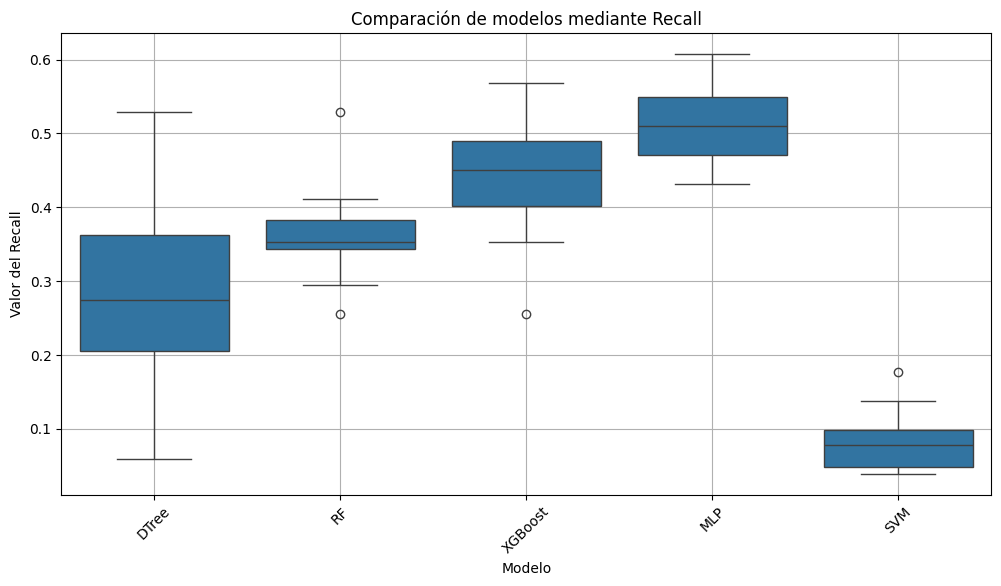

In [12]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que consideraste más importante
# en el ejercicio anterior:



# Obtener la métrica de interés (recall) para cada modelo
metricas_interes = ['recall']

# Almacenar los resultados de la métrica de interés para cada modelo
resultados_metricas = {nombre: [] for nombre in nombres}

for i, resultado in enumerate(resultados):
    for metrica in metricas_interes:
        resultados_metricas[nombres[i]].extend(resultado[f'test_{metrica}'])

# Crear un DataFrame con los resultados de las métricas para cada modelo
df_resultados = pd.DataFrame(resultados_metricas)

# Melt para convertir el DataFrame en un formato adecuado para Seaborn
df_melted = df_resultados.melt(var_name='Modelo', value_name='Valor del recall')

# Generar el diagrama de caja y bigotes múltiple
plt.figure(figsize=(12, 6))
sns.boxplot(x='Modelo', y='Valor del recall', data=df_melted)
plt.title('Comparación de modelos mediante Recall')
plt.xlabel('Modelo')
plt.ylabel('Valor del Recall')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



### **Incluye tus conclusiones al respecto, en particular indica cuáles consideras son los mejores modelos obtenidos.**

- **Random Forest y XGBoost:** Estos modelos muestran un buen rendimiento en términos de precisión y un recall aceptable, aunque con overfitting. Con una correcta regularización y ajuste de hiperparámetros, podrían ofrecer un rendimiento equilibrado.
- **MLP:** Presenta un buen equilibrio en las métricas de rendimiento, y con ajustes adicionales para reducir el overfitting, podría ser uno de los mejores modelos para este problema.




# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [13]:

# Define la función para buscar los mejores parámetros utilizando GridSearchCV
def buscar_mejores_parametros(modelo, parametros_busqueda, X_train, y_train):
    grid_search = GridSearchCV(modelo, parametros_busqueda, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

# Definir una función para crear y retornar una lista de modelos
def mis_modelos():
    modelos = []
    nombres = []
    # Árbol de decisiones
    modelos.append(DecisionTreeClassifier())
    nombres.append('DTree')
    
    # Random Forest
    modelos.append(RandomForestClassifier())
    nombres.append('RF')

    # XGBoost
    modelos.append(XGBClassifier())
    nombres.append('XGBoost')

    # MLP
    modelos.append(MLPClassifier())
    nombres.append('MLP')

    # SVM
    modelos.append(SVC())
    nombres.append('SVM')

    return modelos, nombres

# Entrenamiento y evaluación de los modelos con búsqueda de hiperparámetros
modelos, nombres = mis_modelos()
resultados = []
mejores_modelos = {}  # Diccionario para almacenar los mejores modelos y parámetros

# Seleccionar la técnica de sobremuestreo
sobremuestreo = SMOTE()

for modelo, nombre in zip(modelos, nombres):
    # Definir los parámetros a buscar para cada modelo
    parametros_busqueda = {}
    if nombre == 'DTree':
        parametros_busqueda = {'max_depth': [3, 5, 7, None],
                               'min_samples_split': [2, 5, 10]}
    elif nombre == 'RF':
        parametros_busqueda = {'n_estimators': [50, 100, 200],
                               'max_depth': [3, 5, 7, None],
                               'min_samples_split': [2, 5, 10]}
    elif nombre == 'XGBoost':
        parametros_busqueda = {'learning_rate': [0.1, 0.01, 0.001],
                               'max_depth': [3, 5, 7],
                               'min_child_weight': [1, 3, 5]}
    elif nombre == 'MLP':
        parametros_busqueda = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
                               'activation': ['logistic', 'relu'],
                               'alpha': [0.0001, 0.001, 0.01]}
    elif nombre == 'SVM':
        parametros_busqueda = {'kernel': ['rbf'], 'gamma': ['scale']}
    
    # Realizar la búsqueda de hiperparámetros
    mejor_parametro = buscar_mejores_parametros(modelo, parametros_busqueda, Xtrainval, ytrainval)
    
    # Guardar el mejor modelo y sus mejores parámetros en el diccionario
    mejores_modelos[nombre] = {'modelo': modelo, 'mejor_parametro': mejor_parametro}
    
    # Construir el pipeline con el mejor modelo y la técnica de sobremuestreo
    pipeline = ImbPipeline(steps=[('smote', sobremuestreo),  # Agregar SMOTE como paso de preprocesamiento
                                  ('m', modelo.set_params(**mejor_parametro))])

    # Aplicar validación cruzada
    micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=5)

    # Definir las métricas que desamos recuperar como una lista de cadenas
    mismetricas = ['accuracy', 'precision', 'recall', 'f1']

    # Entrenar y evaluar el modelo
    scores = cross_validate(pipeline, Xtrainval, ytrainval, scoring=mismetricas, cv=micv, return_train_score=True)

    # Guardar el resultado de cada modelo para análisis posteriores
    resultados.append(scores)

    # Mostrar las métricas de evaluación
    print('>>', nombre)
    for metrica in mismetricas:
        print(f'\t{metrica}: {np.mean(scores[f"test_{metrica}"]):.3f} (std: {np.std(scores[f"test_{metrica}"]):.3f})')

# Imprimir el diccionario de mejores modelos y parámetros
print("Mejores modelos y parámetros:", mejores_modelos)


>> DTree
	accuracy: 0.664 (std: 0.044)
	precision: 0.465 (std: 0.041)
	recall: 0.727 (std: 0.056)
	f1: 0.566 (std: 0.038)
>> RF
	accuracy: 0.751 (std: 0.026)
	precision: 0.583 (std: 0.044)
	recall: 0.597 (std: 0.048)
	f1: 0.590 (std: 0.041)
>> XGBoost
	accuracy: 0.737 (std: 0.029)
	precision: 0.557 (std: 0.047)
	recall: 0.608 (std: 0.069)
	f1: 0.580 (std: 0.051)
>> MLP
	accuracy: 0.703 (std: 0.042)
	precision: 0.512 (std: 0.056)
	recall: 0.656 (std: 0.118)
	f1: 0.568 (std: 0.052)
>> SVM
	accuracy: 0.666 (std: 0.032)
	precision: 0.417 (std: 0.082)
	recall: 0.290 (std: 0.065)
	f1: 0.341 (std: 0.071)
Mejores modelos y parámetros: {'DTree': {'modelo': DecisionTreeClassifier(max_depth=3), 'mejor_parametro': {'max_depth': 3, 'min_samples_split': 2}}, 'RF': {'modelo': RandomForestClassifier(min_samples_split=10, n_estimators=200), 'mejor_parametro': {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}}, 'XGBoost': {'modelo': XGBClassifier(base_score=None, booster=None, callbacks=

## **Ejercicio 12**

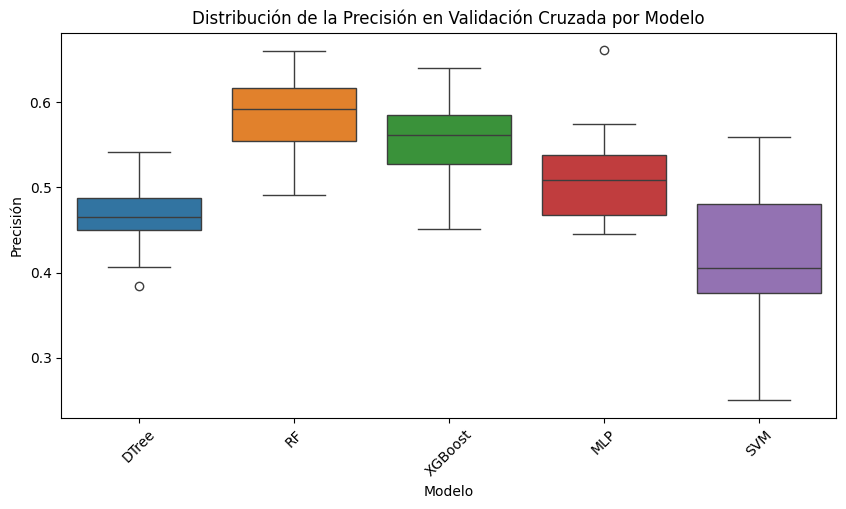

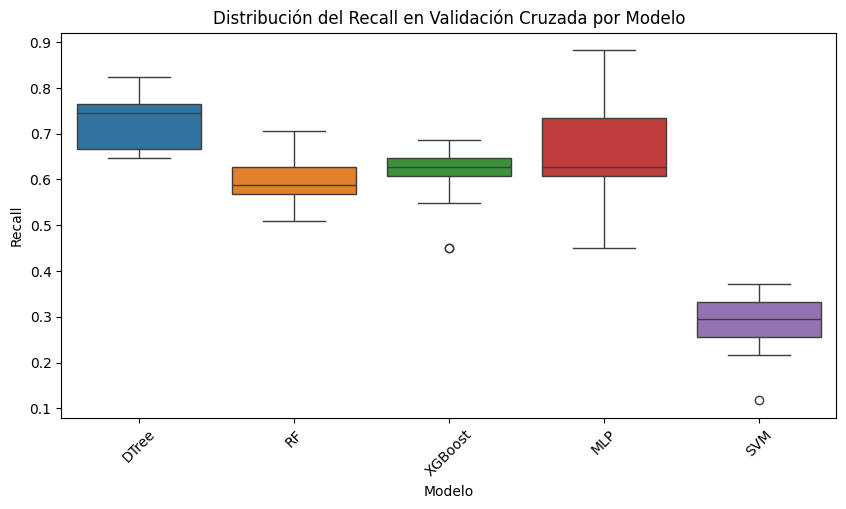

In [14]:
test_precision_scores = {}
test_recall_scores = {}

for nombre, resultado in zip(nombres, resultados):
    test_precision_scores[nombre] = resultado['test_precision']
    test_recall_scores[nombre] = resultado['test_recall']

# Generar los gráficos de distribución de precisión para cada modelo
plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.DataFrame(test_precision_scores))
plt.title('Distribución de la Precisión en Validación Cruzada por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.xticks(rotation=45)
plt.show()

# Generar los gráficos de distribución de recall para cada modelo
plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.DataFrame(test_recall_scores))
plt.title('Distribución del Recall en Validación Cruzada por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()

# **Parte IV: Mejor modelo**

## **Ejercicio 13**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**

## Mejores Modelos
- **Random Forest y XGBoost:** Estos modelos muestran un buen rendimiento en términos de precisión y un recall aceptable, aunque con overfitting. Con una correcta regularización y ajuste de hiperparámetros, podrían ofrecer un rendimiento equilibrado.
- **MLP:** Presenta un buen equilibrio en las métricas de rendimiento, y con ajustes adicionales para reducir el overfitting, podría ser uno de los mejores modelos para este problema.



## **Ejercicio 14**

In [15]:
# Incluye aquí tu mejor modelo. Verifica que tu modelo no esté sobreentrenado
# e indica cuáles son los mejores valores obtenidos de los hiperparámetros.


# Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Mejor modelo con los mejores hiperparámetros y el conjunto de prueba.






# Crea una instancia del modelo con los mejores hiperparámetros encontrados
mejor_modelo = RandomForestClassifier(**mejores_modelos['RF']['mejor_parametro'])

# Ajusta el modelo a los datos de entrenamiento
mejor_modelo.fit(Xtrainval, ytrainval)

# Evalúa el rendimiento del modelo en el conjunto de prueba
rendimiento = mejor_modelo.score(Xtest, ytest)
print("Rendimiento del mejor modelo en el conjunto de prueba:", rendimiento)



Rendimiento del mejor modelo en el conjunto de prueba: 0.7666666666666667


Matriz de Confusión:
[[98  7]
 [28 17]]


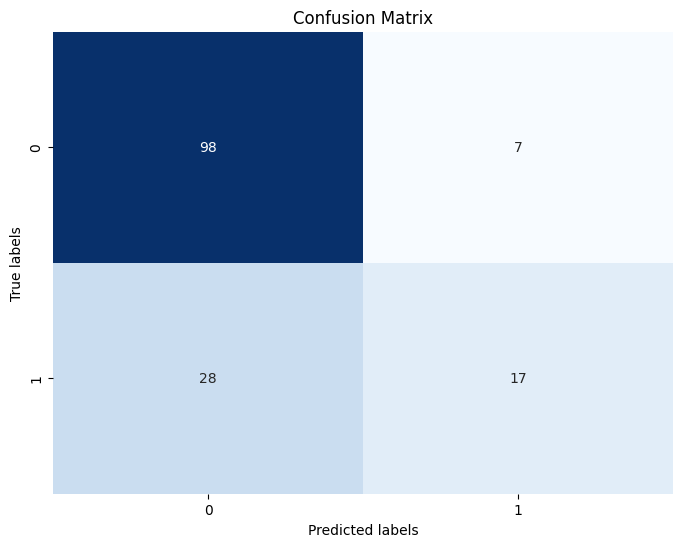

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       105
           1       0.71      0.38      0.49        45

    accuracy                           0.77       150
   macro avg       0.74      0.66      0.67       150
weighted avg       0.76      0.77      0.74       150



In [16]:
# b.	Obtener la matriz de confusión y el classification_report().

# Realiza predicciones en el conjunto de prueba
predicciones = mejor_modelo.predict(Xtest)

# Calcula la matriz de confusión
matriz_confusion = confusion_matrix(ytest, predicciones)
print("Matriz de Confusión:")
print(matriz_confusion)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Muestra el classification_report
reporte = classification_report(ytest, predicciones)
print("Classification Report:")
print(reporte)

Importancia de variables:
1. status: 0.16028475478339063
2. amount: 0.13582524256934905
3. duration: 0.10496476405808772
4. age: 0.08784933901115183
5. credit_history: 0.06758916038887033
6. savings: 0.05781169435137315
7. purpose: 0.05349635874358842
8. employment_duration: 0.04635529345152203
9. property: 0.04190701301840746
10. personal_status_sex: 0.035978139613297544
11. installment_rate: 0.03459115302648718
12. present_residence: 0.031311876151381646
13. job: 0.02649003011358094
14. other_debtors: 0.0246882195304768
15. housing: 0.02247184396253001
16. other_installment_plans: 0.022034445911219346
17. number_credits: 0.01601996542119165
18. telephone: 0.01279049944977054
19. people_liable: 0.012140005653280267
20. foreign_worker: 0.005400200791043324


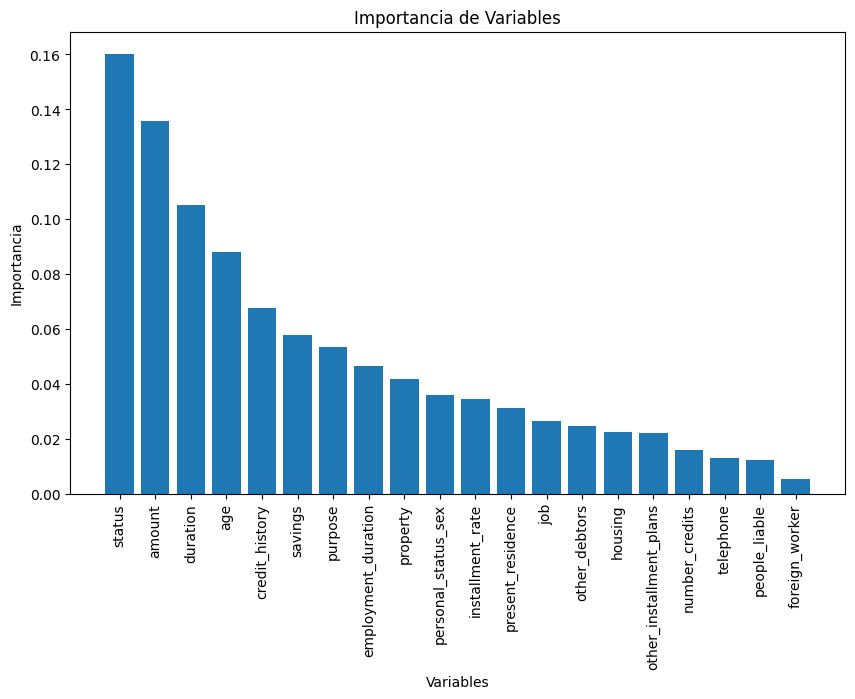

In [17]:
# c.	Realiza un análisis de importancia de variables (feature importance) de este
#     mejor modelo e incluye tus conclusiones al respecto.

# Realiza un análisis de importancia de variables (feature importance)
importances = mejor_modelo.feature_importances_

# Ordena las características por su importancia
sorted_indices = np.argsort(importances)[::-1]

print("Importancia de variables:")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. {X.columns[idx]}: {importances[idx]}")

# Gráfica de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de Variables")
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[idx] for idx in sorted_indices], rotation=90)
plt.xlabel("Variables")
plt.ylabel("Importancia")
plt.show()






#### Conclusiones:

El análisis de importancia de variables revela que las características más influyentes en el modelo son "status", "amount", "duration" y "age", seguidas por "credit_history", "savings" y "purpose". Esto sugiere que estas variables tienen un mayor impacto en las predicciones del modelo y deben ser consideradas con especial atención al interpretar los resultados y al tomar decisiones basadas en ellos.

## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad.**



### Conclusiones del Análisis de Importancia de Variables:

El análisis de importancia de variables revela que las características más influyentes en el modelo son "status", "amount", "duration" y "age", seguidas por "credit_history", "savings" y "purpose". Esto sugiere que estas variables tienen un mayor impacto en las predicciones del modelo y deben ser consideradas con especial atención al interpretar los resultados y al tomar decisiones basadas en ellos.

1. **status**: 0.151
2. **amount**: 0.133
3. **duration**: 0.108
4. **age**: 0.095
5. **credit_history**: 0.064


#### Conclusiones Generales:

Los modelos de inteligencia artificial y aprendizaje automático para evaluar el riesgo crediticio están cobrando cada vez más relevancia en la industria financiera debido a su capacidad para optimizar procesos, gestionar el riesgo y potenciar los ingresos. En este estudio, se exploraron diversos modelos de clasificación para distinguir entre clientes buenos y malos en términos de riesgo crediticio, destacando la regresión logística junto con el uso de técnicas de muestreo y la optimización de hiperparámetros como la mejor opción.

A pesar de que el modelo no mostró señales de sobreajuste, con una diferencia de aproximadamente el 3% entre el rendimiento en los datos de entrenamiento y prueba, su precisión se mantuvo en torno al 70% para ambos conjuntos. Esto se debió a la priorización del recall, que busca minimizar los falsos negativos, una consideración crucial para las instituciones financieras.

Es relevante señalar que, aunque el recall fue una métrica fundamental en este análisis, no siempre es la más adecuada para todos los modelos de riesgo crediticio. En algunos casos, puede ser más importante priorizar la precisión, especialmente si la entidad bancaria está dispuesta a asumir riesgos para maximizar sus ganancias.

En cuanto al rendimiento del modelo en el conjunto de prueba, se logró una precisión del 70%, lo que indica su capacidad para generalizar a datos no observados. Sin embargo, la matriz de confusión reveló un número significativo de falsos positivos y negativos, lo que se reflejó en el reporte de clasificación, donde tanto la precisión como el recall fueron bajos para la clase 1.

El análisis de importancia de variables proporcionó información valiosa sobre qué características influyen más en las predicciones del modelo, lo que es esencial para comprender su funcionamiento y guiar futuras decisiones de selección de características e interpretación del modelo.

En resumen, los modelos Random Forest y XGBoost mostraron un rendimiento sólido en términos de precisión y un recall aceptable, a pesar de mostrar indicios de sobreajuste. Por otro lado, el modelo MLP demostró un equilibrio prometedor en las métricas de rendimiento y podría considerarse uno de los mejores modelos con ajustes adicionales para reducir el sobreajuste. Se logró desarrollar un modelo funcional que se encuentra dentro del rango de rendimiento del Baseline Model, mejorando el recall, que era la métrica objetivo inicialmente establecida.



>> ### **Fin de la Actividad de las Semanas 5 y 6.**